

<p align ="left"><font size="5">Program to implement Non-Linear Spatial Filtering</font></p>

# Types of Non-Linear Filters
1. Minimum Filter
2. Maximum Filter
3. Median Filter


In [ ]:
from PIL import Image, ImageFilter
import cv2
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def min_max_filter(original_image):

  print("Size of Image: ", original_image.size)
  min_filter= original_image.filter(ImageFilter.MinFilter(size = 3))
  max_filter = original_image.filter(ImageFilter.MaxFilter(size = 3))
  print()
  fig = plt.figure(figsize = (12.7,8.7))
  fig.add_subplot(1,3, 1)
  plt.imshow(original_image)
  plt.axis('on')
  plt.title("Original Image")

  fig.add_subplot(1,3, 2)
  plt.imshow(min_filter)
  plt.axis('on')
  plt.title("Minimum Filtered Image")

  fig.add_subplot(1,3,3)
  plt.imshow(max_filter)
  plt.axis("on")
  plt.title("Maximum Filtered Image")
  plt.tight_layout()
  plt.show()

def rgb_median(image):
  border_image =cv2.copyMakeBorder(src=image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  original_image_median= cv2.medianBlur(image, 3)
  border_original_image_median =cv2.copyMakeBorder(src=original_image_median, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  print()
  print("Original Image\t\t\t\t\t\t Median filter Added to Original Image")
  rgb_image = cv2.hconcat([border_image, border_original_image_median])
  cv2_imshow(rgb_image)

def gray_median(gray_image, noise_img):

  border_gray_image=cv2.copyMakeBorder(src=gray_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_noise_image =cv2.copyMakeBorder(src=noise_img, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)

  median_image= cv2.medianBlur(noise_img,3 )
  border_noisy_median_image =cv2.copyMakeBorder(src=median_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)

  print()
  print("Gray-Scale Image\t\t\t\t\t\tNoisy Gray Image\t\t Median Filtered Gray Image")
  gray_image =cv2.hconcat([border_gray_image, border_noise_image, border_noisy_median_image])
  cv2_imshow(gray_image)

def lin_nonlin(noise_img):

  print("\n\nComparison Between Linear and Non-Linear Filter")
  median= cv2.medianBlur(noise_img,3 )
  border_noisy_median_image =cv2.copyMakeBorder(src=median, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  gauss =cv2.GaussianBlur(noise_img, (5,5),0)
  border_gauss =cv2.copyMakeBorder(src=gauss, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  print("Median Filter\t\t\t\t\t\tGaussian Filter")
  gauss_med = cv2.hconcat([border_noisy_median_image, border_gauss])
  cv2_imshow(gauss_med)





***NON-LINEAR SPATIAL FILTERING TECHNIQUES***

Size of Image:  (350, 350)



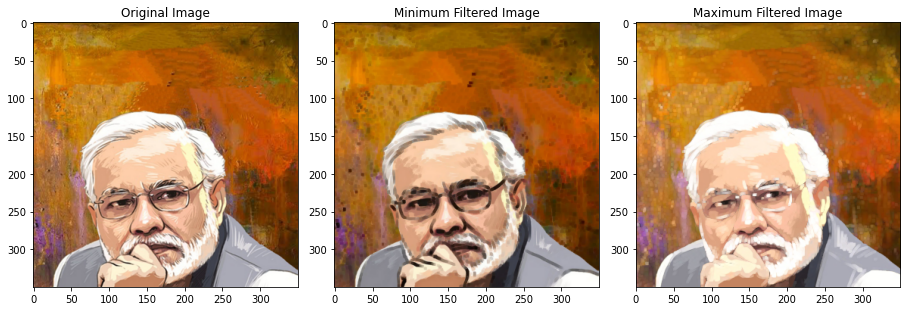


Original Image						 Median filter Added to Original Image


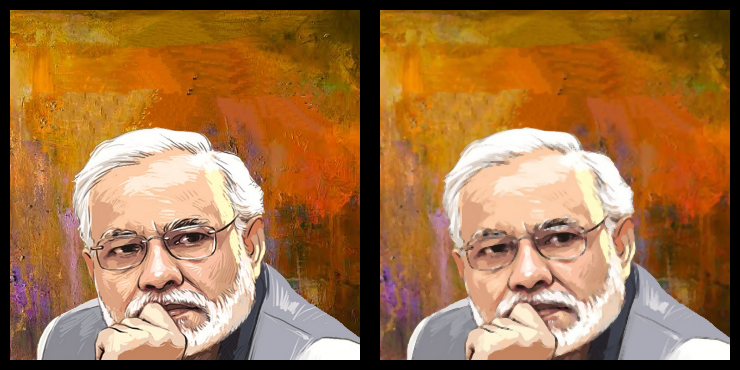


Gray-Scale Image						Noisy Gray Image		 Median Filtered Gray Image


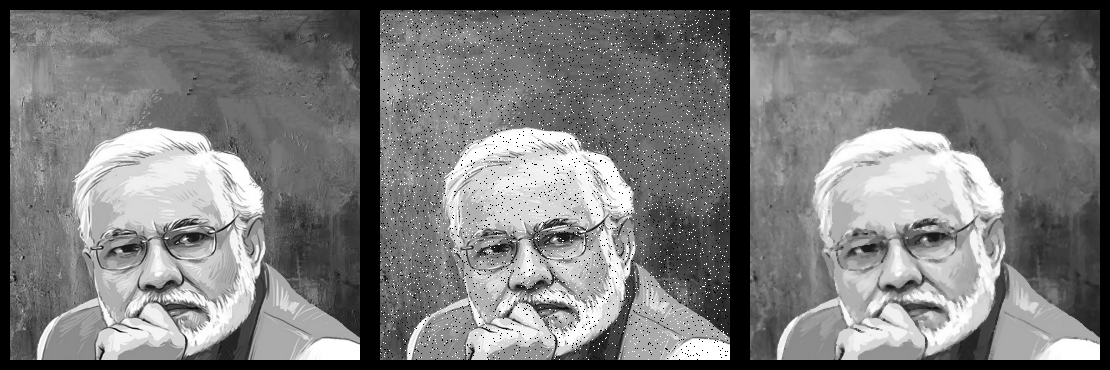



Comparison Between Linear and Non-Linear Filter
Median Filter						Gaussian Filter


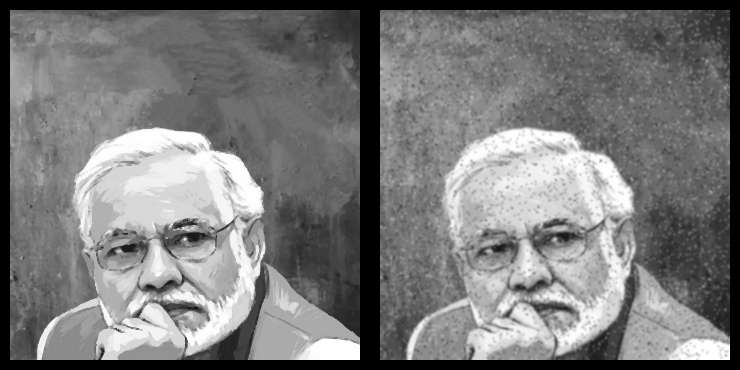

In [ ]:
def main():
  print("***NON-LINEAR SPATIAL FILTERING TECHNIQUES***\n")
  image1 = Image.open("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/lab 4.jpg")
  original_image  = image1.resize((350,350))
  min_max_filter(original_image)

  image =cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/lab 4.jpg")
  image = cv2.resize(image, (350,350))
  rgb_median(image)
  gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  noise_image = random_noise(gray_image, mode="s&p", amount = 0.05)
  noise_image = np.array(255*noise_image, dtype ="uint8")
  gray_median(gray_image, noise_image)
  lin_nonlin(noise_image)

main()


In [ ]:
def user_defined_filters(noise_img, image):
  print("\n\n\n*Filtering Using user-defined functions*")
  m,n  = noise_img.shape
  new_image = np.zeros([m,n])
  for i in range(1, m-1):
    for j in range(1, n-1):
      temp = [noise_img[i-1,j-1],
              noise_img[i-1,j],
              noise_img[i-1,j+1],
              noise_img[i,j-1],
              noise_img[i,j],
              noise_img[i, j+1],
              noise_img[i+1,j-1],
              noise_img[i+1,j],
              noise_img[i+1, j+1]]
      temp = sorted(temp)
      new_image[i,j]= temp[4]
  new_image = new_image.astype(np.uint8)
  border_new_image =cv2.copyMakeBorder(src=new_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)

  m,n,x = image.shape
  min_new_image = np.zeros([m,n])
  max_new_image = np.zeros([m,n])

  for i in range(1, m-1):
    for j in range(1, n-1):
      temp = [image[i-1,j-1],
              image[i-1,j],
              image[i-1,j+1],
              image[i,j-1],
              image[i,j],
              image[i, j+1],
              image[i+1,j-1],
              image[i+1,j],
              image[i+1, j+1] ]

      min_new_image[i,j]= np.min(temp)
      max_new_image[i,j] =np.max(temp)
  min_new_image = min_new_image.astype(np.uint8)
  max_new_image = max_new_image.astype(np.uint8)
  border_min_new_image =cv2.copyMakeBorder(src=min_new_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_max_new_image =cv2.copyMakeBorder(src=max_new_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)

  print("Median Filter\t\t\t\t\tMinimum Filter\t\t\t\t\t\tMaximum Filter")
  user_images = cv2.hconcat([border_new_image, border_min_new_image, border_max_new_image])
  cv2_imshow(user_images)






*Filtering Using user-defined functions*
Median Filter					Minimum Filter						Maximum Filter


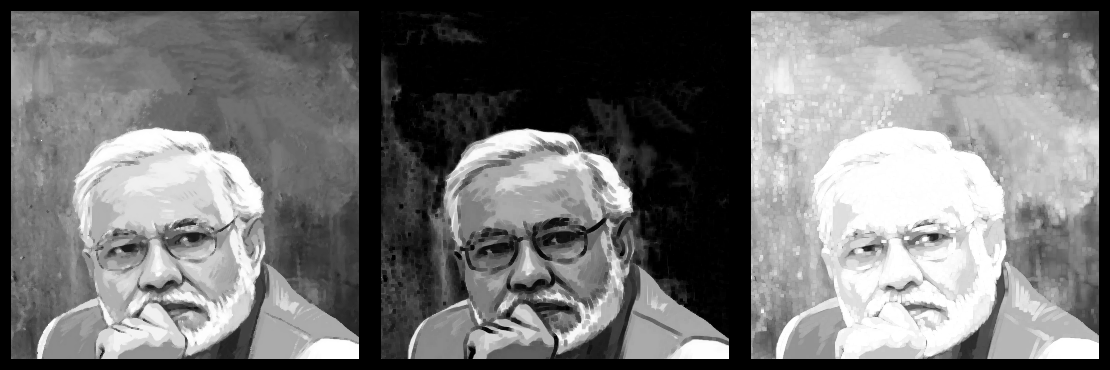


Median filter using built-in function


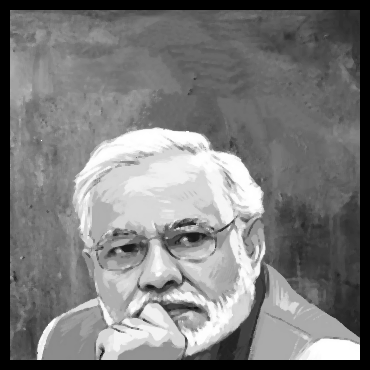

In [ ]:
def main2():
  image =cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/lab 4.jpg", )
  image = cv2.resize(image, (350,350))
  gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  noise_image = random_noise(gray_image, mode="s&p", amount = 0.05)
  noise_image = np.array(255*noise_image, dtype ="uint8")
  user_defined_filters(noise_image, image)
main2()